In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data/Yodak.csv', encoding='cp949')

data.head(5)

,PSEUDO_ID,TEST_CD,TEST_REPRT_DATE,TEST_RESULT
0,1868285,B0010,20090917,Yellow
1,1868285,B0010,20091022,Yellow
2,1868285,B0010,20091127,Yellow
3,1868285,B0010,20100105,Yellow
4,1868285,B0010,20100209,Yellow


In [3]:
len(data)

500000

# Data Preprocessing

In [4]:
# find nan

data.isna().sum()

PSEUDO_ID          0
TEST_CD            0
TEST_REPRT_DATE    0
TEST_RESULT        0
dtype: int64

In [5]:
# find duplicates

data.duplicated().sum()

3

In [6]:
data[data.duplicated()]

,PSEUDO_ID,TEST_CD,TEST_REPRT_DATE,TEST_RESULT
136608,50819265,백혈구,20130914,22
408200,891166425,잠혈,20180413,0
484173,930047895,잠혈,20190513,5


In [7]:
# drop duplicates

data = data.drop_duplicates()

len(data)

499997

## Selecting columns

In [8]:
data.TEST_CD.value_counts()

비중          34778
B0043GG     34766
B0043HH     34761
B0043II     34753
산도          34660
단백질         34638
잠혈          34629
B0010       34627
백혈구         34623
포도당         34590
케톤체         34527
아질산염        34526
우로빌리노겐      34517
빌리루빈        34515
B0030ROO    12274
B0030RPP     2416
B0030RGG      189
B0030RDD       88
B0030RQQ       78
B0030RFF       40
B0030REE        2
Name: TEST_CD, dtype: int64

In [9]:
# 오줌 색, 단백질, 백혈구, 비중, 빌리루빈, 산도, 아질산염, 우로빌리노겐, 잠혈, 케톤체, 포도당

protein = data.loc[data.TEST_CD == '단백질']
leukocyte = data.loc[data.TEST_CD == '백혈구']
sg = data.loc[data.TEST_CD == '비중']
bilirubin = data.loc[data.TEST_CD == '빌리루빈']
acidity = data.loc[data.TEST_CD == '산도']
nitrite = data.loc[data.TEST_CD == '아질산염']
urobilinogen = data.loc[data.TEST_CD == '우로빌리노겐']
occult_blood  = data.loc[data.TEST_CD == '잠혈']
ketone_body = data.loc[data.TEST_CD == '케톤체']
glucose = data.loc[data.TEST_CD == '포도당']

# Making Data

In [10]:
protein.PSEUDO_ID.value_counts()

100130475    170
2088715      150
50819265     143
930011215    125
930147815    122
            ... 
70053215      20
150068385     19
80032675      19
850192935     19
911746785     19
Name: PSEUDO_ID, Length: 966, dtype: int64

In [11]:
protein.rename(columns={'TEST_RESULT' : 'Protein'}, inplace=True)
leukocyte.rename(columns={'TEST_RESULT' : 'Leukocyte'}, inplace=True)
sg.rename(columns={'TEST_RESULT' : 'SG'}, inplace=True)
bilirubin.rename(columns={'TEST_RESULT' : 'Bilirubin'}, inplace=True)
acidity.rename(columns={'TEST_RESULT' : 'Acidity'}, inplace=True)
nitrite.rename(columns={'TEST_RESULT' : 'Nitrite'}, inplace=True)
urobilinogen.rename(columns={'TEST_RESULT' : 'Urobilinogen'}, inplace=True)
occult_blood.rename(columns={'TEST_RESULT' : 'Occult_blood'}, inplace=True)
ketone_body.rename(columns={'TEST_RESULT' : 'Ketone_body'}, inplace=True)
glucose.rename(columns={'TEST_RESULT' : 'Glucose'}, inplace=True)

c:\ProgramData\Anaconda3\envs\Yodak\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
protein.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
leukocyte.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
sg.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
bilirubin.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
acidity.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
nitrite.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
urobilinogen.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
occult_blood.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
ketone_body.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
glucose.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)

In [13]:
protein = protein.Protein
leukocyte = leukocyte.Leukocyte
sg = sg.SG
bilirubin = bilirubin.Bilirubin
acidity = acidity.Acidity
nitrite = nitrite.Nitrite
urobilinogen = urobilinogen.Urobilinogen
occult_blood = occult_blood.Occult_blood
ketone_body = ketone_body.Ketone_body
glucose = glucose.Glucose

In [14]:
dataset = pd.merge(protein, leukocyte, how='outer', left_index=True, right_index=True)

for col in [sg, bilirubin, acidity, nitrite, urobilinogen,
            occult_blood, ketone_body, glucose]:
    dataset = pd.merge(dataset, col, how='outer', left_index=True, right_index=True)

In [15]:
sg = []

for data_sg in dataset.SG:
    data_sg = str(data_sg)
    
    if '>>' in data_sg or data_sg == np.nan:
        sg.append(np.nan)
    elif '=' in data_sg:
        sg.append(float(data_sg.split('=')[-1]))
    elif '>' in data_sg:
        sg.append(float(data_sg.split('>')[-1]))
    elif '<' in data_sg:
        sg.append(float(data_sg.split('<')[-1]))
    else:
        sg.append(float(data_sg))

sg = np.array(sg).reshape(-1)

dataset.SG = sg

In [16]:
dataset = dataset.astype({'Protein' : 'float',
                          'Leukocyte' : 'float',
                          'SG' : 'float',
                          'Bilirubin' : 'float',
                          'Acidity' : 'float',
                          'Nitrite' : 'float',
                          'Urobilinogen' : 'float',
                          'Occult_blood' : 'float',
                          'Ketone_body' : 'float',
                          'Glucose' : 'float',})

In [17]:
dataset.isna().sum()

Protein         47
Leukocyte       47
SG               2
Bilirubin       47
Acidity         47
Nitrite         47
Urobilinogen    47
Occult_blood    47
Ketone_body     47
Glucose         47
dtype: int64

In [18]:
dataset = dataset.fillna(dataset.mean())

In [18]:
dataset = dataset.Protein.fillna(dataset.Protein.mean())
dataset = dataset.Leukocyte.fillna(dataset.Leukocyte.mean())
dataset = dataset.Bilirubin.fillna(dataset.Bilirubin.mean())
dataset = dataset.Acidity.fillna(dataset.Acidity.mean())
dataset = dataset.Nitrite.fillna(dataset.Nitrite.mean())
dataset = dataset.Urobilinogen.fillna(dataset.Urobilinogen.mean())
dataset = dataset.Occult_blood.fillna(dataset.Occult_blood.mean())
dataset = dataset.Ketone_body.fillna(dataset.Ketone_body.mean())
dataset = dataset.Glucose.fillna(dataset.Glucose.mean())

AttributeError: 'Series' object has no attribute 'Leukocyte'

In [19]:
dataset.isna().sum()

Protein         0
Leukocyte       0
SG              0
Bilirubin       0
Acidity         0
Nitrite         0
Urobilinogen    0
Occult_blood    0
Ketone_body     0
Glucose         0
dtype: int64

In [20]:
dataset.duplicated().sum()

31

In [21]:
dataset

Protein   Leukocyte     SG  Bilirubin   Acidity  \
PSEUDO_ID TEST_REPRT_DATE                                                       
1868285   20090917           1.000000  119.000000  1.020    0.10000  5.000000   
          20091022           4.000000  106.000000  1.020    0.00000  5.000000   
          20091127           6.000000  657.000000  1.016    0.10000  5.000000   
          20100105           3.000000  818.000000  1.011    0.30000  5.000000   
          20100209           7.000000  621.000000  1.006    0.40000  5.000000   
...                               ...         ...    ...        ...       ...   
930247415 20160922         214.451505  144.993054  1.012    0.23063  5.875839   
          20161124         214.451505  144.993054  1.015    0.23063  5.875839   
          20170119         214.451505  144.993054  1.012    0.23063  5.875839   
          20170316         214.451505  144.993054  1.010    0.23063  5.875839   
          20170518         214.451505  144.993054  1.011    0.23063  5.875839   

                                 Nitrite  Urobilinogen  Occult_blood  \
PSEUDO_ID TEST_REPRT_DATE                                              
1868285   20090917         103842.000000      0.700000      3.000000   
          20091022         108098.000000      0.700000      2.000000   
          20091127          27515.000000      0.700000     40.000000   
          20100105         108963.000000      0.200000      0.000000   
          20100209         100520.000000      0.700000      3.000000   
...                                  ...           ...           ...   
930247415 20160922          53255.882452      0.498892     97.162352   
          20161124          53255.882452      0.498892     97.162352   
          20170119          53255.882452      0.498892     97.162352   
          20170316          53255.882452      0.498892     97.162352   
          20170518          53255.882452      0.498892     97.162352   

                           Ketone_body     Glucose  
PSEUDO_ID TEST_REPRT_DATE                           
1868285   20090917            1.000000   16.000000  
          20091022            1.000000   65.000000  
          20091127            3.000000   79.000000  
          20100105            3.000000    1.000000  
          20100209            3.000000   67.000000  
...                                ...         ...  
930247415 20160922            2.844107  211.499077  
          20161124            2.844107  211.499077  
          20170119            2.844107  211.499077  
          20170316            2.844107  211.499077  
          20170518            2.844107  211.499077  

[39061 rows x 10 columns]

In [23]:
dataset.shape

(39061, 10)

In [24]:
dataset.to_csv('../Data/dataset_f_10.csv', index=False)

In [25]:
dataset = pd.read_csv('../Data/dataset_f_10.csv')

dataset.head(5)

,Protein,Leukocyte,SG,Bilirubin,Acidity,Nitrite,Urobilinogen,Occult_blood,Ketone_body,Glucose
0,1.0,119.0,1.020,0.1,5.0,103842.0,0.7,3.0,1.0,16.0
1,4.0,106.0,1.020,0.0,5.0,108098.0,0.7,2.0,1.0,65.0
2,6.0,657.0,1.016,0.1,5.0,27515.0,0.7,40.0,3.0,79.0
3,3.0,818.0,1.011,0.3,5.0,108963.0,0.2,0.0,3.0,1.0
4,7.0,621.0,1.006,0.4,5.0,100520.0,0.7,3.0,3.0,67.0


In [28]:
dataset.corr()

,Protein,Leukocyte,SG,Bilirubin,Acidity,Nitrite,Urobilinogen,Occult_blood,Ketone_body,Glucose
Protein,1.000000,0.111926,0.172464,0.111258,0.048950,-0.000061,0.034228,0.161397,0.045915,0.075083
Leukocyte,0.111926,1.000000,-0.008071,0.121439,0.137950,0.113715,0.122953,0.272616,0.086889,0.006374
SG,0.172464,-0.008071,1.000000,0.097079,-0.155252,-0.001431,0.050358,0.078309,0.139034,0.201779
Bilirubin,0.111258,0.121439,0.097079,1.000000,0.081414,0.057041,0.121495,0.086392,0.209672,-0.047414
Acidity,0.048950,0.137950,-0.155252,0.081414,1.000000,0.018349,0.076957,0.045205,0.085123,0.026859
Nitrite,-0.000061,0.113715,-0.001431,0.057041,0.018349,1.000000,0.000278,0.014746,0.011162,-0.010974
Urobilinogen,0.034228,0.122953,0.050358,0.121495,0.076957,0.000278,1.000000,0.082346,0.072927,-0.020053
Occult_blood,0.161397,0.272616,0.078309,0.086392,0.045205,0.014746,0.082346,1.000000,0.077413,-0.013262
Ketone_body,0.045915,0.086889,0.139034,0.209672,0.085123,0.011162,0.072927,0.077413,1.000000,0.111668
Glucose,0.075083,0.006374,0.201779,-0.047414,0.026859,-0.010974,-0.020053,-0.013262,0.111668,1.000000


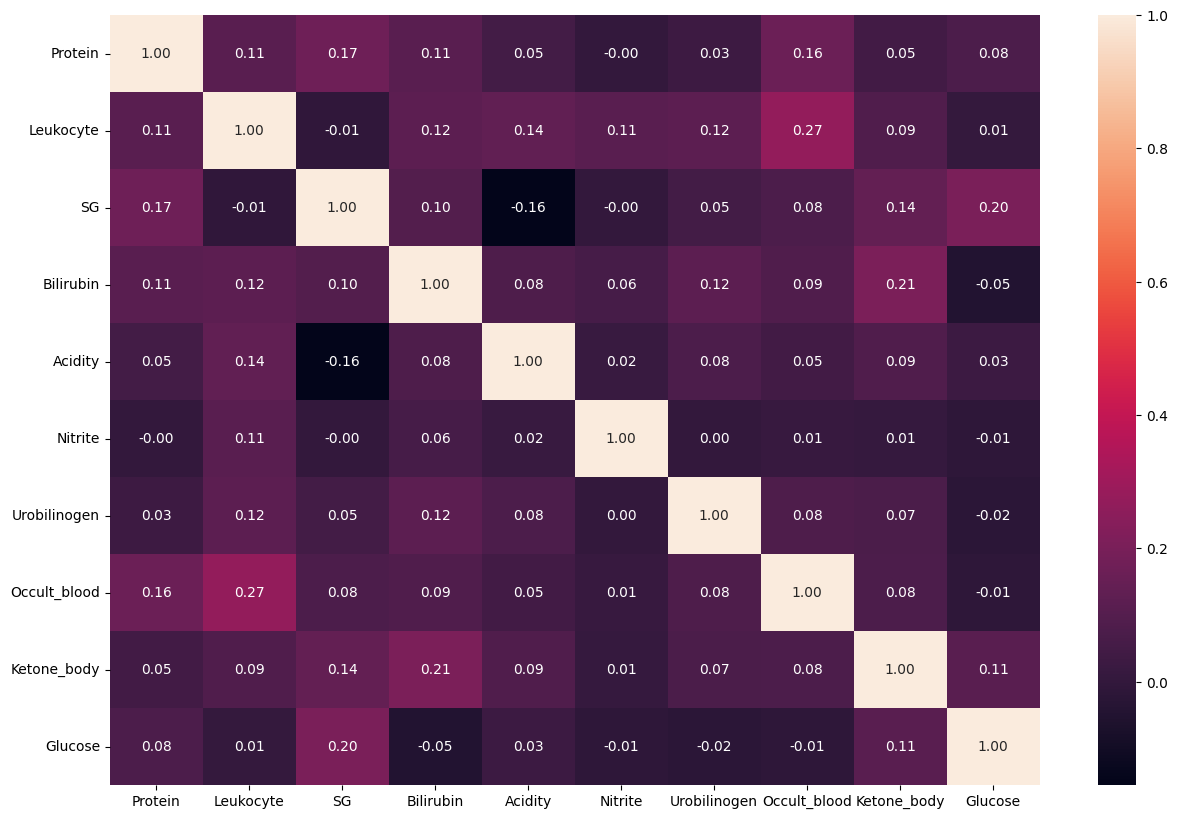

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(data=dataset.corr(), annot=True, fmt='.2f')

plt.show()

<Figure size 1500x1000 with 0 Axes>

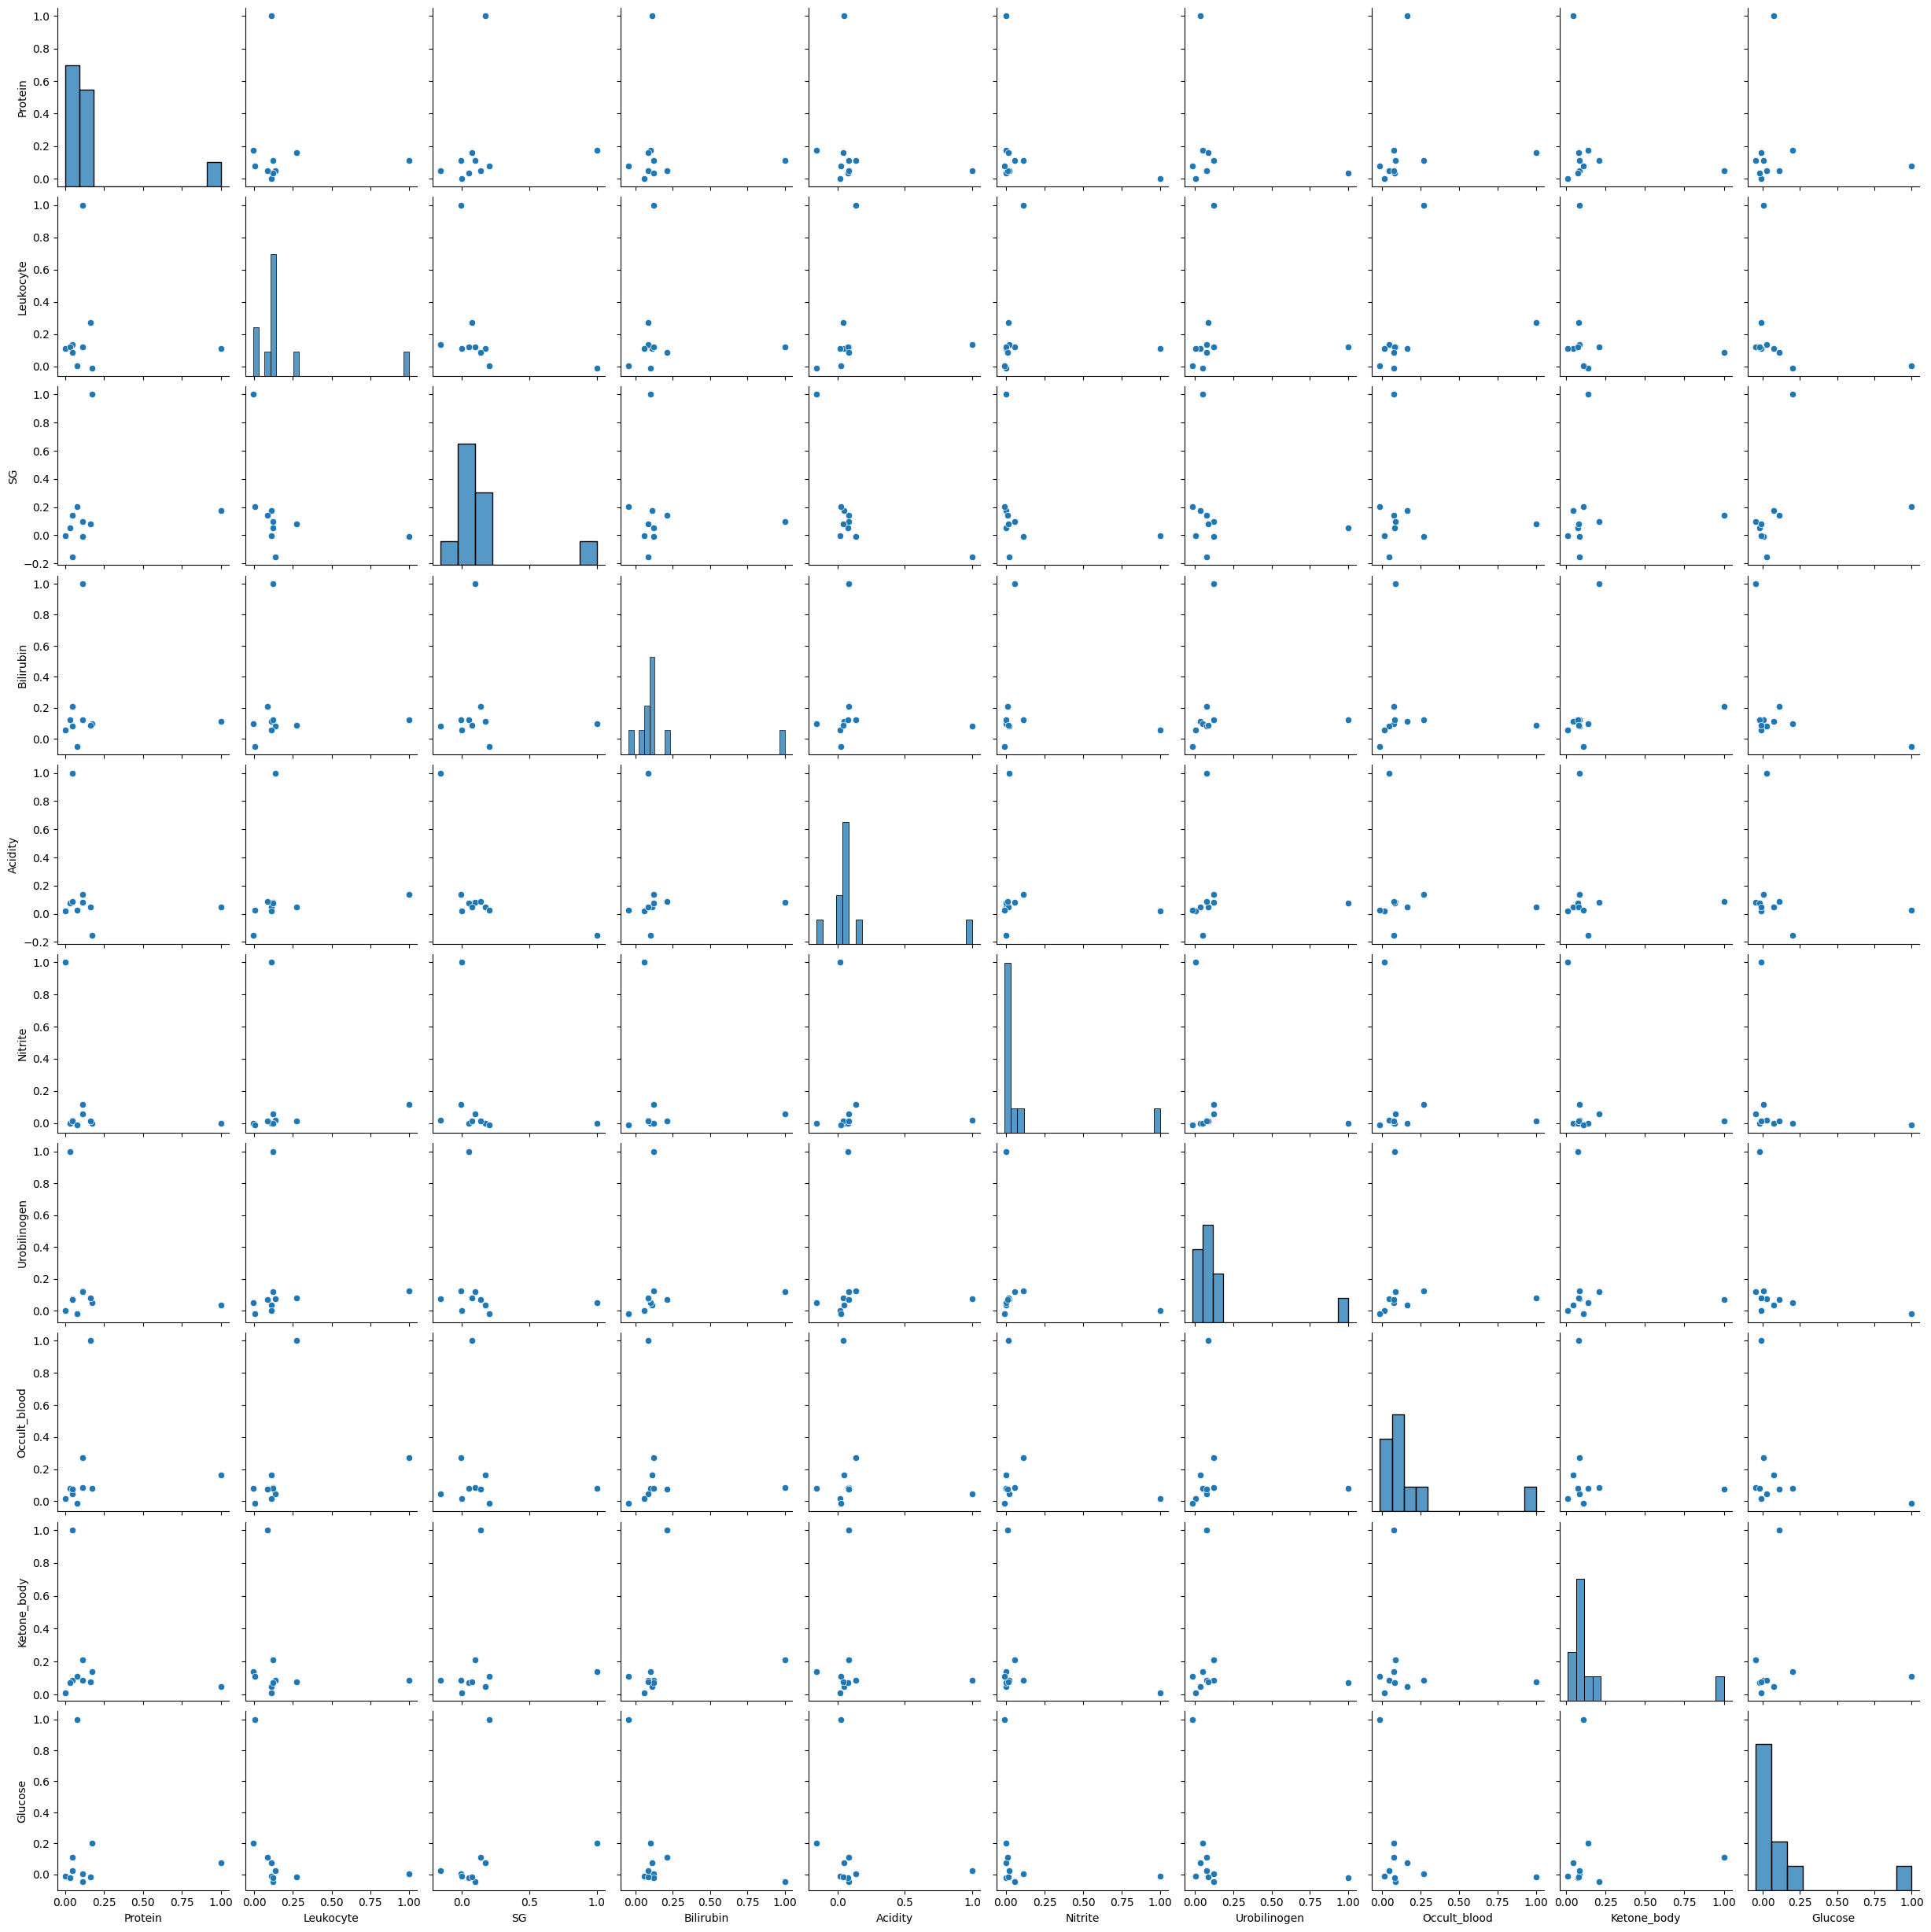

In [30]:
plt.figure(figsize=(15,10))
sns.pairplot(dataset.corr())

plt.show()

In [31]:
dataset.corr()['Protein'].abs().sort_values(ascending=False)

Protein         1.000000
SG              0.172464
Occult_blood    0.161397
Leukocyte       0.111926
Bilirubin       0.111258
Glucose         0.075083
Acidity         0.048950
Ketone_body     0.045915
Urobilinogen    0.034228
Nitrite         0.000061
Name: Protein, dtype: float64

In [32]:
dataset.corr()['Leukocyte'].abs().sort_values(ascending=False)

Leukocyte       1.000000
Occult_blood    0.272616
Acidity         0.137950
Urobilinogen    0.122953
Bilirubin       0.121439
Nitrite         0.113715
Protein         0.111926
Ketone_body     0.086889
SG              0.008071
Glucose         0.006374
Name: Leukocyte, dtype: float64

In [33]:
dataset.corr()['SG'].abs().sort_values(ascending=False)

SG              1.000000
Glucose         0.201779
Protein         0.172464
Acidity         0.155252
Ketone_body     0.139034
Bilirubin       0.097079
Occult_blood    0.078309
Urobilinogen    0.050358
Leukocyte       0.008071
Nitrite         0.001431
Name: SG, dtype: float64

In [34]:
dataset.corr()['Bilirubin'].abs().sort_values(ascending=False)

Bilirubin       1.000000
Ketone_body     0.209672
Urobilinogen    0.121495
Leukocyte       0.121439
Protein         0.111258
SG              0.097079
Occult_blood    0.086392
Acidity         0.081414
Nitrite         0.057041
Glucose         0.047414
Name: Bilirubin, dtype: float64

In [35]:
dataset.corr()['Acidity'].abs().sort_values(ascending=False)

Acidity         1.000000
SG              0.155252
Leukocyte       0.137950
Ketone_body     0.085123
Bilirubin       0.081414
Urobilinogen    0.076957
Protein         0.048950
Occult_blood    0.045205
Glucose         0.026859
Nitrite         0.018349
Name: Acidity, dtype: float64

In [36]:
dataset.corr()['Nitrite'].abs().sort_values(ascending=False)

Nitrite         1.000000
Leukocyte       0.113715
Bilirubin       0.057041
Acidity         0.018349
Occult_blood    0.014746
Ketone_body     0.011162
Glucose         0.010974
SG              0.001431
Urobilinogen    0.000278
Protein         0.000061
Name: Nitrite, dtype: float64

In [37]:
dataset.corr()['Urobilinogen'].abs().sort_values(ascending=False)

Urobilinogen    1.000000
Leukocyte       0.122953
Bilirubin       0.121495
Occult_blood    0.082346
Acidity         0.076957
Ketone_body     0.072927
SG              0.050358
Protein         0.034228
Glucose         0.020053
Nitrite         0.000278
Name: Urobilinogen, dtype: float64

In [38]:
dataset.corr()['Occult_blood'].abs().sort_values(ascending=False)

Occult_blood    1.000000
Leukocyte       0.272616
Protein         0.161397
Bilirubin       0.086392
Urobilinogen    0.082346
SG              0.078309
Ketone_body     0.077413
Acidity         0.045205
Nitrite         0.014746
Glucose         0.013262
Name: Occult_blood, dtype: float64

In [39]:
dataset.corr()['Ketone_body'].abs().sort_values(ascending=False)

Ketone_body     1.000000
Bilirubin       0.209672
SG              0.139034
Glucose         0.111668
Leukocyte       0.086889
Acidity         0.085123
Occult_blood    0.077413
Urobilinogen    0.072927
Protein         0.045915
Nitrite         0.011162
Name: Ketone_body, dtype: float64

In [40]:
dataset.corr()['Glucose'].abs().sort_values(ascending=False)

Glucose         1.000000
SG              0.201779
Ketone_body     0.111668
Protein         0.075083
Bilirubin       0.047414
Acidity         0.026859
Urobilinogen    0.020053
Occult_blood    0.013262
Nitrite         0.010974
Leukocyte       0.006374
Name: Glucose, dtype: float64

In [ ]:
# 아질산염, 우로빌리노겐, 잠혈, 케톤체, 포도당